# Влияние компьютерных игр на счастье
Сейчас мы построим визуализации наших данных для полного их представления.

## Визуализация
На этом шаге мы построим несколько графиков, которые помогут нам разобраться в наших данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_prepared.csv")
df.head(5)

,id,age,gender,game_hours_per_day,game_days_per_week,game_type,game_genre,game_friends_activity,game_importance,game_addiction,game_favorite,happiness_general,happiness_personal,happiness_work,happiness_joy,happiness_stress
0,1855465575,19,M,3,1,Single,Adventure,3,True,False,The Last Of Us,7,3,8,4,2
1,1856114803,20,M,4,6,Multiplayer,Action,4,True,True,Deadlock,7,7,4,5,3
2,1856117571,19,M,0,1,Multiplayer,Action,3,True,False,Valorant,7,4,7,4,3
3,1856208774,20,M,1,2,Multiplayer,Role-Play,4,True,False,Dota 2,7,10,3,4,2
4,1856316803,20,M,0,0,Single,Adventure,0,False,False,The Witcher 3,8,9,7,4,1


Пока что соберем просто небольшие факты о данных.  
Узнаем, как распределены возраст и пол.

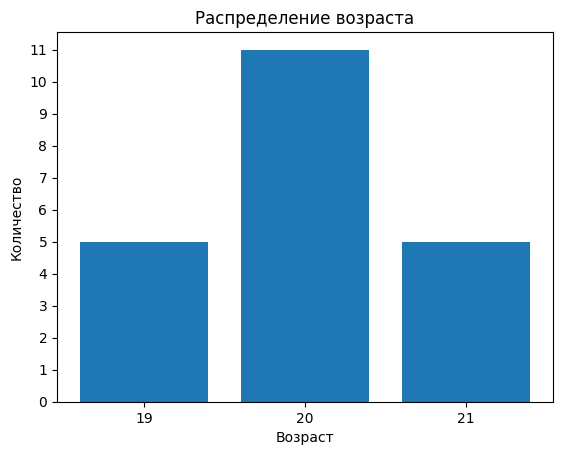

In [2]:
age_series = df.age.value_counts().sort_index()
plt.bar(x=age_series.index.map(str), height=age_series.values)
plt.yticks(range(age_series.max()+1))
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

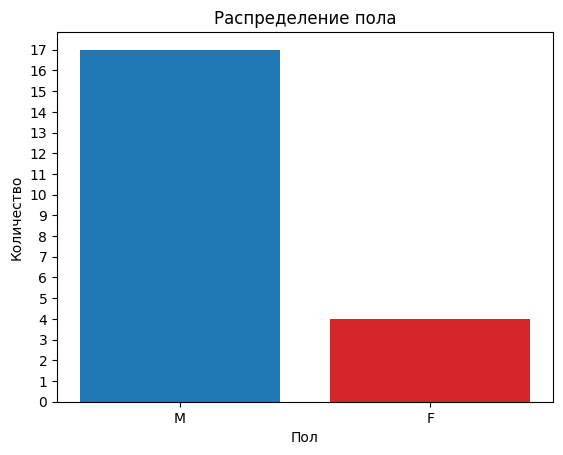

In [3]:
gender_series = df.gender.value_counts()
plt.bar(x=gender_series.index, height=gender_series.values, color=["tab:blue", "tab:red"])
plt.yticks(range(gender_series.max()+1))
plt.title("Распределение пола")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()

Как можно заметить, возраст распределен нормально, а мужчин в распределении напорядок больше чем девушек.

Теперь узнаем, сколько часов в неделю играют наши опрошенные.

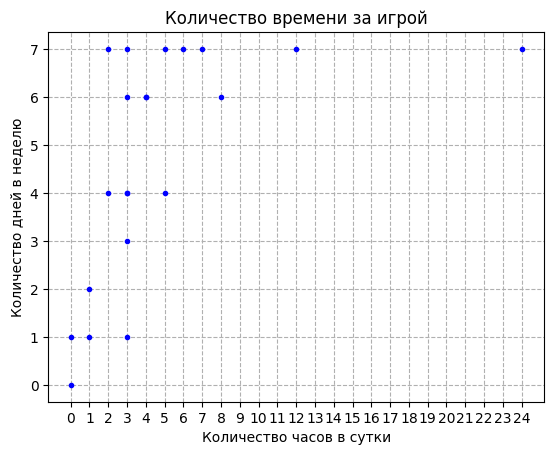

In [4]:
plt.plot(df.game_hours_per_day, df.game_days_per_week, "b.")
plt.title("Количество времени за игрой")
plt.xlabel("Количество часов в сутки")
plt.ylabel("Количество дней в неделю")
plt.xticks(range(0, df.game_hours_per_day.max()+1))
plt.grid(linestyle="--")
plt.show()

Глядя на график, можно сказать, что люди играют преимущественно от 2 до 7 часов в день и от 6 до 7 дней в неделю.  
Однако, есть некоторые выбросы, играющие 24 на 7 или не играющие вовсе.

Узнаем, какие игры предпочитают испытуемые.

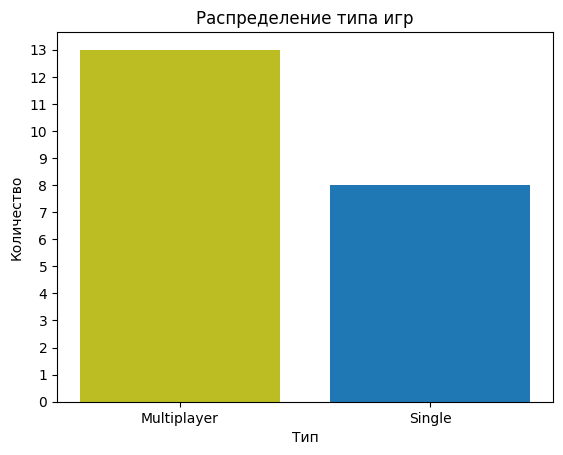

In [5]:
game_type_series = df.game_type.value_counts()
plt.bar(x=game_type_series.index, height=game_type_series.values, color=["tab:olive", "tab:blue"])
plt.yticks(range(game_type_series.max()+1))
plt.title("Распределение типа игр")
plt.xlabel("Тип")
plt.ylabel("Количество")
plt.show()

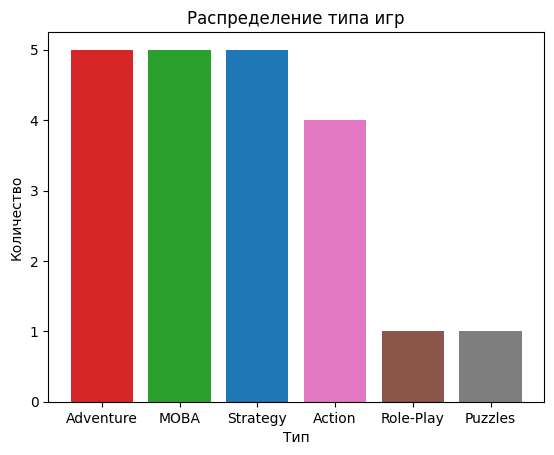

In [6]:
game_genre_series = df.game_genre.value_counts()
plt.bar(x=game_genre_series.index, height=game_genre_series.values, color=["tab:red",
                                                                           "tab:green",
                                                                           "tab:blue",
                                                                           "tab:pink",
                                                                           "tab:brown",
                                                                          "tab:gray"])
plt.yticks(range(game_genre_series.max()+1))
plt.title("Распределение типа игр")
plt.xlabel("Тип")
plt.ylabel("Количество")
plt.show()

Теперь узнаем, насколько важны игр у респондентов.

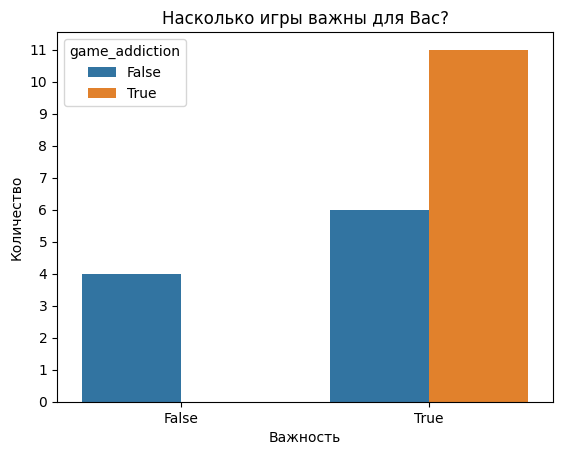

In [7]:
sns.countplot(data=df, x="game_importance", hue="game_addiction")
plt.title("Насколько игры важны для Вас?")
plt.xlabel("Важность")
plt.ylabel("Количество")
plt.yticks(range(df.game_addiction.value_counts().max()+1))
plt.show()

На этом графике отображено, насколько людям важно играть в игры и сколькие люди зависимы от игр.

Узнаем самые популярные игры респондентов и перейдем к визуализации данных о счастье.

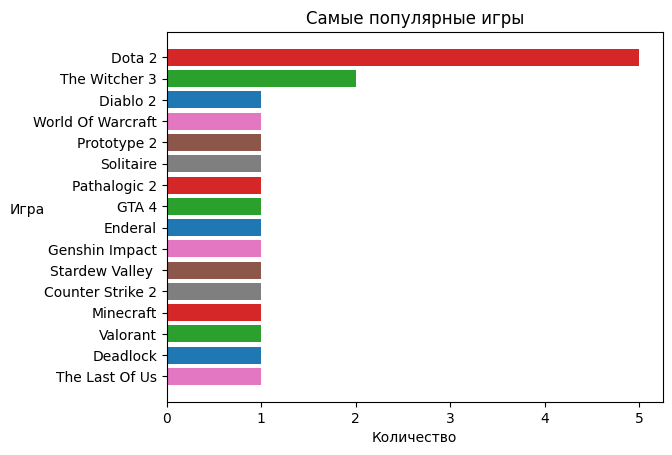

In [8]:
favorite_games = df.game_favorite.value_counts().sort_values()
plt.barh(y=favorite_games.index, width=favorite_games.values, color=["tab:brown",
                                                                     "tab:gray",
                                                                     "tab:red",
                                                                     "tab:green",
                                                                     "tab:blue",
                                                                     "tab:pink"][::-1])
plt.title("Самые популярные игры")
plt.xlabel("Количество")
plt.ylabel("Игра", rotation=0)
plt.show()

С неплохим отрывом лидирует игра Dota 2.

Теперь опишем распределения наших данных, связанных с счастьем.

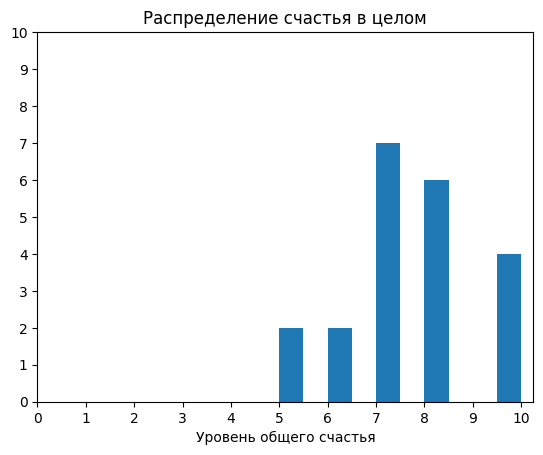

In [9]:
plt.hist(df.happiness_general)
plt.title("Распределение счастья в целом")
plt.xlabel("Уровень общего счастья")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()

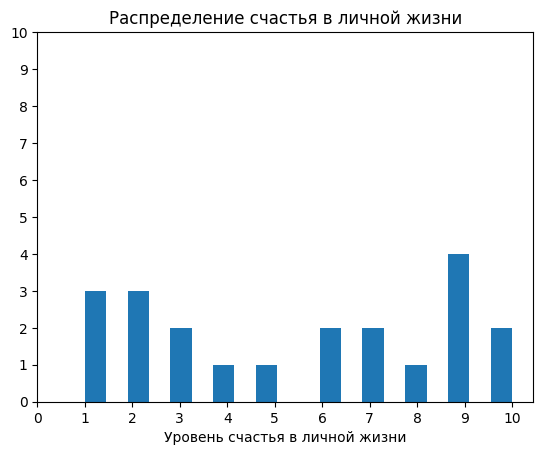

In [10]:
plt.hist(df.happiness_personal, bins=20)
plt.title("Распределение счастья в личной жизни")
plt.xlabel("Уровень счастья в личной жизни")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()

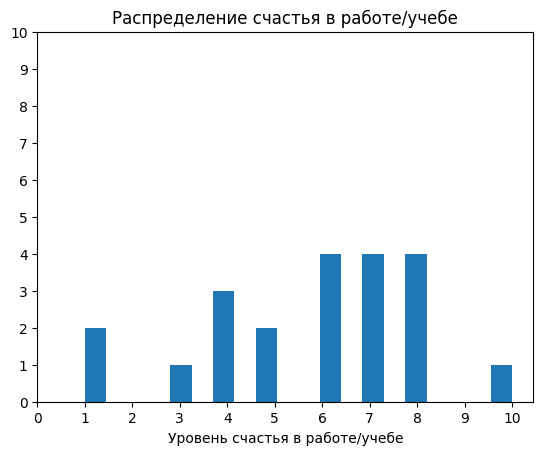

In [11]:
plt.hist(df.happiness_work, bins=20)
plt.title("Распределение счастья в работе/учебе")
plt.xlabel("Уровень счастья в работе/учебе")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()

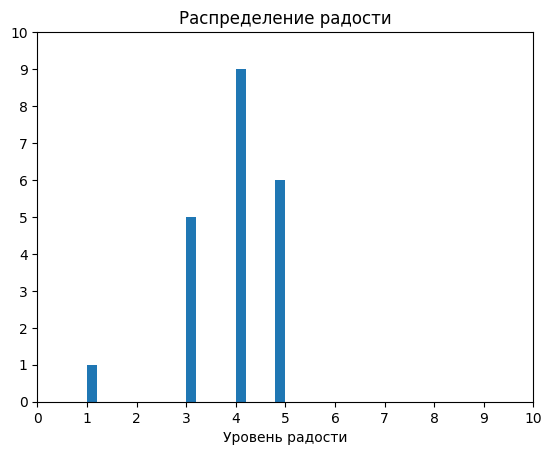

In [12]:
plt.hist(df.happiness_joy, bins=20)
plt.title("Распределение радости")
plt.xlabel("Уровень радости")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()

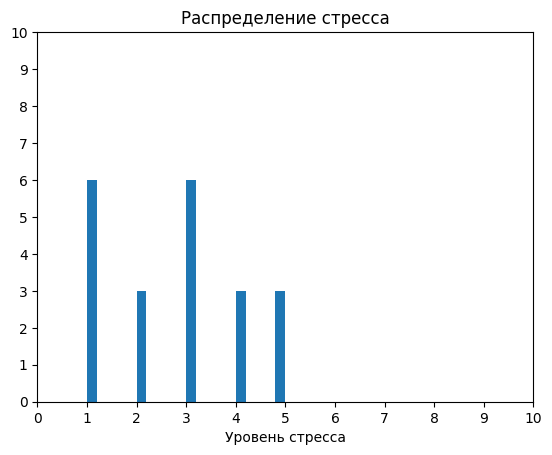

In [13]:
plt.hist(df.happiness_stress, bins=20)
plt.title("Распределение стресса")
plt.xlabel("Уровень стресса")
plt.xticks(range(11))
plt.yticks(range(11))
plt.show()